# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Шаг 1.** Загрузка данных;

In [15]:
df = pd.read_csv('dataset_telecom.csv')

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

In [16]:
df.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

Корректировка типов данных

In [18]:
df = df.astype({'Дата подключения тарифа': 'datetime64[s]'})

In [19]:
df['Звонков ночью за месяц'].unique()
df['Звонков ночью за месяц'] = df['Звонков ночью за месяц'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Доля звонков на стационарные телефоны'] = df['Доля звонков на стационарные телефоны'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Количество SMS за месяц'] = df['Количество SMS за месяц'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Звонки в другие города'] = df['Звонки в другие города'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype        
---  ------                                 --------------  -----        
 0   Возраст                                4492 non-null   int64        
 1   Среднемесячный расход                  4468 non-null   float64      
 2   Средняя продолжительность разговоров   4475 non-null   float64      
 3   Звонков днем за месяц                  4472 non-null   float64      
 4   Звонков вечером за месяц               4489 non-null   float64      
 5   Звонков ночью за месяц                 4492 non-null   float64      
 6   Звонки в другие города                 4492 non-null   float64      
 7   Звонки в другие страны                 4492 non-null   int64        
 8   Доля звонков на стационарные телефоны  4492 non-null   float64      
 9   Количество SMS за месяц                4492 non-null   float64      
 10  

Просмотр описательных статистик

In [20]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
df.describe(percentiles=perc)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.273152,8.661175,0.394034,10.331701,21.243321,2018-07-10 01:04:50
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
1%,19.000000,7.790100,0.400000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-02-04 13:51:33
5%,20.000000,16.800000,1.100000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-22 02:14:24
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 08:23:49
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,2018-06-21 16:56:24
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,2020-04-04 18:48:26
90%,58.000000,1068.250000,8.300000,104.000000,128.000000,19.000000,31.000000,1.000000,23.000000,57.900000,2021-04-30 12:42:08
95%,63.000000,1610.304500,9.700000,133.000000,142.000000,35.000000,38.450000,2.000000,27.000000,78.450000,2021-08-20 13:17:48


поиск и обработка дубликатов(дублей не найдено)

In [21]:
df.duplicated().sum()

np.int64(0)

переименование столбцов

In [22]:
df.rename(columns={'Возраст': 'age',
    'Среднемесячный расход': 'monthly_spend',
    'Средняя продолжительность разговоров': 'avg_call_duration',
    'Звонков днем за месяц': 'day_calls',
    'Звонков вечером за месяц': 'evening_calls',
    'Звонков ночью за месяц': 'night_calls',
    'Звонки в другие города': 'other_city_calls',
    'Звонки в другие страны': 'international_calls',
    'Доля звонков на стационарные телефоны': 'landline_call_ratio',
    'Количество SMS за месяц': 'sms_count',
    'Дата подключения тарифа': 'subscription_date'},
               inplace=True)

In [23]:
dct_to_pic = {'age':'Возраст',
    'monthly_spend':'Среднемесячный расход',
    'avg_call_duration':'Средняя продолжительность разговоров',
    'day_calls':'Звонков днем за месяц',
    'evening_calls':'Звонков вечером за месяц',
    'night_calls':'Звонков ночью за месяц',
    'other_city_calls':'Звонки в другие города',
    'international_calls':'Звонки в другие страны',
    'landline_call_ratio':'Доля звонков на стационарные телефоны',
    'sms_count':'Количество SMS за месяц',
    'subscription_date':'Дата подключения тарифа'}

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   age                  4492 non-null   int64        
 1   monthly_spend        4468 non-null   float64      
 2   avg_call_duration    4475 non-null   float64      
 3   day_calls            4472 non-null   float64      
 4   evening_calls        4489 non-null   float64      
 5   night_calls          4492 non-null   float64      
 6   other_city_calls     4492 non-null   float64      
 7   international_calls  4492 non-null   int64        
 8   landline_call_ratio  4492 non-null   float64      
 9   sms_count            4492 non-null   float64      
 10  subscription_date    4492 non-null   datetime64[s]
dtypes: datetime64[s](1), float64(8), int64(2)
memory usage: 386.2 KB


поиск аномальных значений

In [25]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [26]:
# список непрерывных признаков
lst_var_cont = ['monthly_spend','day_calls', 'evening_calls',
                 'night_calls', 'avg_call_duration']

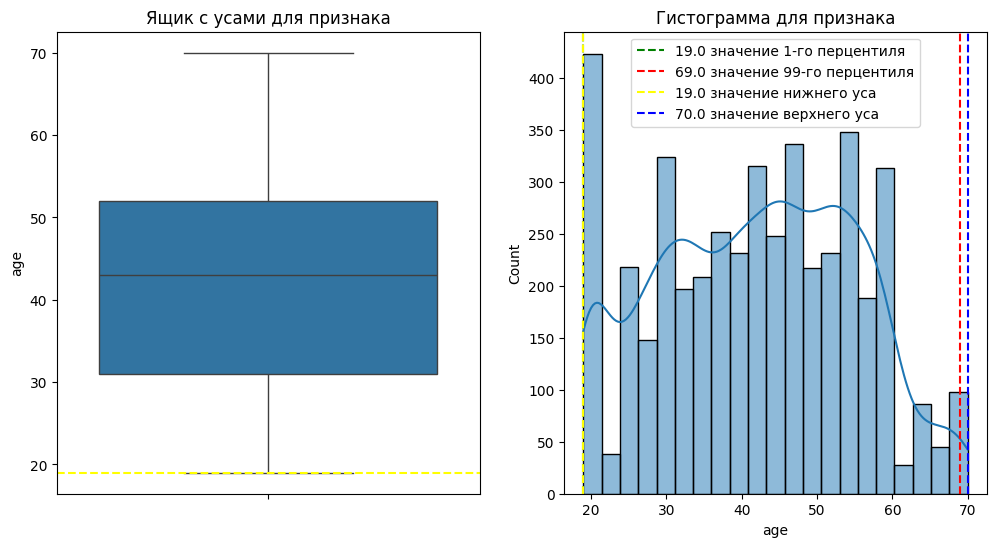

In [27]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2, 1)
ax_1 = sns.boxplot(data=df,
                   y='age');
plt.title('Ящик с усами для признака')
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_1.axhline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')


# 1 - гистограмма
plt.subplot(1,2, 2)
ax_2 = sns.histplot(df['age'],
                    kde=True);
plt.title('Гистограмма для признака')
per_1 = np.nanpercentile(df['age'], 1)
per_99 = np.nanpercentile(df['age'], 99)
# расчет и визуализация перцентилей
ax_2.axvline(per_1,
             color='green',
             linestyle='--',
             label=f'{np.round(per_1,1)} значение 1-го перцентиля')
ax_2.axvline(per_99,
             color='red',
             linestyle='--',
             label=f'{np.round(per_99,1)} значение 99-го перцентиля')
# расчет и визуализация усов
q_25, low_wish = ax_1.lines[0].get_ydata()
q_75, hi_wish = ax_1.lines[1].get_ydata()
ax_2.axvline(low_wish,
             color='yellow',
             linestyle='--',
             label=f'{np.round(low_wish,1)} значение нижнего уса')

ax_2.axvline(hi_wish,
             color='blue',
             linestyle='--',
             label=f'{np.round(hi_wish,1)} значение верхнего уса')
plt.legend()

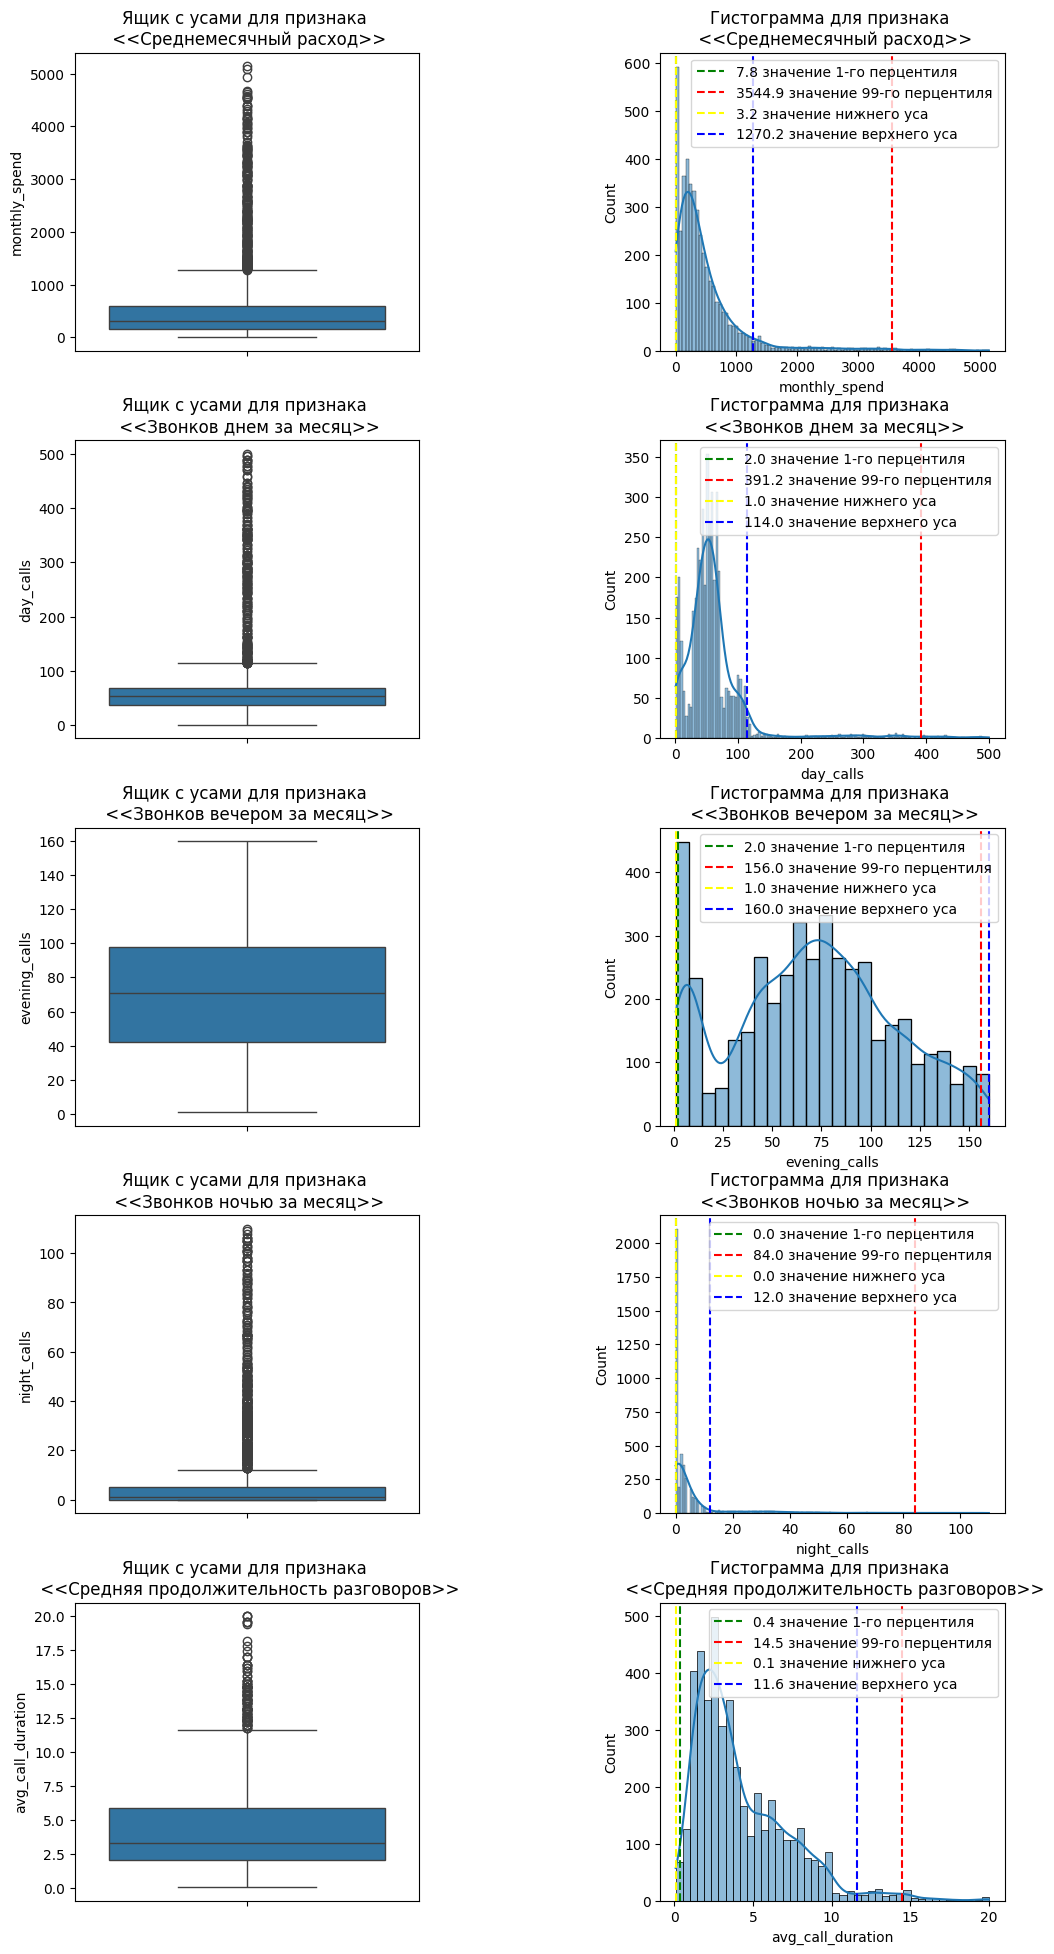

In [28]:
# графики циклически
plt.subplots(5,2, figsize=(12,24), gridspec_kw={'wspace': 0.7,
                                                'hspace': 0.3})
for index, col in enumerate(lst_var_cont):
    plt.subplot(5,2, 2*index+1)
    ax_1 = sns.boxplot(df[col]);
    plt.title(f'Ящик с усами для признака \n <<{dct_to_pic[col]}>>')

    # 1 - гистограмма
    plt.subplot(5,2, 2*index+2)
    ax_2 = sns.histplot(df[col],
                        kde=True);
    plt.title(f'Гистограмма для признака \n <<{dct_to_pic[col]}>>')
    per_1 = np.nanpercentile(df[col], 1)
    per_99 = np.nanpercentile(df[col], 99)
    # расчет и визуализация перцентилей
    ax_2.axvline(per_1,
                color='green',
                linestyle='--',
                label=f'{np.round(per_1,1)} значение 1-го перцентиля')
    ax_2.axvline(per_99,
                color='red',
                linestyle='--',
                label=f'{np.round(per_99,1)} значение 99-го перцентиля')
    # расчет и визуализация усов
    low_wish, hi_wish = calc_boxplot(df[col])
    ax_2.axvline(low_wish,
                color='yellow',
                linestyle='--',
                label=f'{np.round(low_wish,1)} значение нижнего уса')

    ax_2.axvline(hi_wish,
                color='blue',
                linestyle='--',
                label=f'{np.round(hi_wish,1)} значение верхнего уса')
    plt.legend()

по полученным значениям усов и перцентилей подготовим фильтр для удаления аномальных значений

In [29]:
flt = (
           (
                df.monthly_spend.between(calc_boxplot(df['monthly_spend'])[0],
                                 calc_boxplot(df['monthly_spend'])[1])
           )
       &
            (
                df.day_calls.between(calc_boxplot(df['day_calls'])[0],
                                 calc_boxplot(df['day_calls'])[1])
            )
        &
            (
                df.evening_calls.between(calc_boxplot(df['evening_calls'])[0],
                                 calc_boxplot(df['evening_calls'])[1])
             )
       &
             (
               df.night_calls.between(calc_boxplot(df['night_calls'])[0],
                                 calc_boxplot(df['night_calls'])[1])
            )
       &
            (
               df.avg_call_duration.between(calc_boxplot(df['avg_call_duration'])[0],
                                 calc_boxplot(df['avg_call_duration'])[1])
            )
       )

In [30]:
print(f'Процент потерь --- {(1-df.loc[flt].shape[0] / df.shape[0]):.2%}')

Процент потерь --- 15.14%


Процент потерь приемлем. Удаляем аномальные значения

In [31]:
df_tele = df.loc[flt].copy()

In [32]:
df_tele

,age,monthly_spend,avg_call_duration,day_calls,evening_calls,night_calls,other_city_calls,international_calls,landline_call_ratio,sms_count,subscription_date
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53
5,26,324.56,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26


количество пропусков

In [33]:
df.isna().sum()

age                     0
monthly_spend          24
avg_call_duration      17
day_calls              20
evening_calls           3
night_calls             0
other_city_calls        0
international_calls     0
landline_call_ratio     0
sms_count               0
subscription_date       0
dtype: int64

процент пропусков

In [34]:
df.isna().mean() * 100

age                    0.000000
monthly_spend          0.534283
avg_call_duration      0.378451
day_calls              0.445236
evening_calls          0.066785
night_calls            0.000000
other_city_calls       0.000000
international_calls    0.000000
landline_call_ratio    0.000000
sms_count              0.000000
subscription_date      0.000000
dtype: float64

удалить все пропуски так как их число не значительно

In [35]:
df_tele.dropna(inplace=True)

In [36]:
print('Проверка пропусков после обработки:')
df_tele.isna().sum()

Проверка пропусков после обработки:


age                    0
monthly_spend          0
avg_call_duration      0
day_calls              0
evening_calls          0
night_calls            0
other_city_calls       0
international_calls    0
landline_call_ratio    0
sms_count              0
subscription_date      0
dtype: int64

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

вводим новую переменную 

In [38]:
binss = [19, 25, 34, 57, 71]
values = ['student', 'graduate_student', 'businessman', 'expert']
df_tele['age_category'] = pd.cut(df_tele['age'], bins=binss, labels=values, right=False)
df_tele.head()

,age,monthly_spend,avg_call_duration,day_calls,evening_calls,night_calls,other_city_calls,international_calls,landline_call_ratio,sms_count,subscription_date,age_category
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,businessman
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,businessman
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,businessman
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,graduate_student
5,26,324.56,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16,graduate_student


создаем признаки - год, месяц, дата подключения

In [45]:
df_tele['year_connection'] = df_tele['subscription_date'].dt.year
df_tele['month_connection'] = df_tele['subscription_date'].dt.month
df_tele['date_connection'] = df_tele['subscription_date'].dt.date
df_tele.head()

,age,monthly_spend,avg_call_duration,day_calls,evening_calls,night_calls,other_city_calls,international_calls,landline_call_ratio,sms_count,subscription_date,age_category,year_connection,month_connection,day_connection,date_connection
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,businessman,2021,10,21,2021-10-21
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,businessman,2015,3,26,2015-03-26
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,businessman,2016,1,4,2016-01-04
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,graduate_student,2017,5,3,2017-05-03
5,26,324.56,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16,graduate_student,2016,11,13,2016-11-13




**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

Количество клиентов по годам

In [ ]:
clients_year = df_tele['year_connection'].value_counts().sort_index()
clients_year


year_connection
2015    497
2016    554
2017    582
2018    566
2019    499
2020    554
2021    560
Name: count, dtype: int64

Количество клиентов по месяцам (все года вместе)

In [50]:
clients_month = df_tele['month_connection'].value_counts().sort_index()
clients_month


month_connection
1     300
2     329
3     278
4     322
5     350
6     331
7     296
8     363
9     322
10    323
11    308
12    290
Name: count, dtype: int64

количество клиентов по году и месяцу

In [ ]:
clients_year_month = df_tele.groupby(['year_connection', 'month_connection']).size().unstack(fill_value=0)
clients_year_month

month_connection,1,2,3,4,5,6,7,8,9,10,11,12
year_connection,,,,,,,,,,,,
2015,28,56,34,38,49,42,43,37,29,52,42,47
2016,54,57,40,36,44,47,42,58,54,40,44,38
2017,45,43,45,49,55,49,38,58,53,49,46,52
2018,54,48,37,49,54,47,38,49,51,45,49,45
2019,42,36,35,46,44,34,40,57,42,50,33,40
2020,42,47,43,51,48,57,46,47,40,47,52,34
2021,35,42,44,53,56,55,49,57,53,40,42,34


Количество клиентов по датам

In [52]:
clients_date = df_tele['date_connection'].value_counts().sort_index()
clients_date


date_connection
2015-01-01    1
2015-01-04    1
2015-01-05    1
2015-01-06    1
2015-01-08    1
             ..
2021-12-26    2
2021-12-27    2
2021-12-28    3
2021-12-30    2
2021-12-31    1
Name: count, Length: 1992, dtype: int64

## графики

динамика подключений по годам

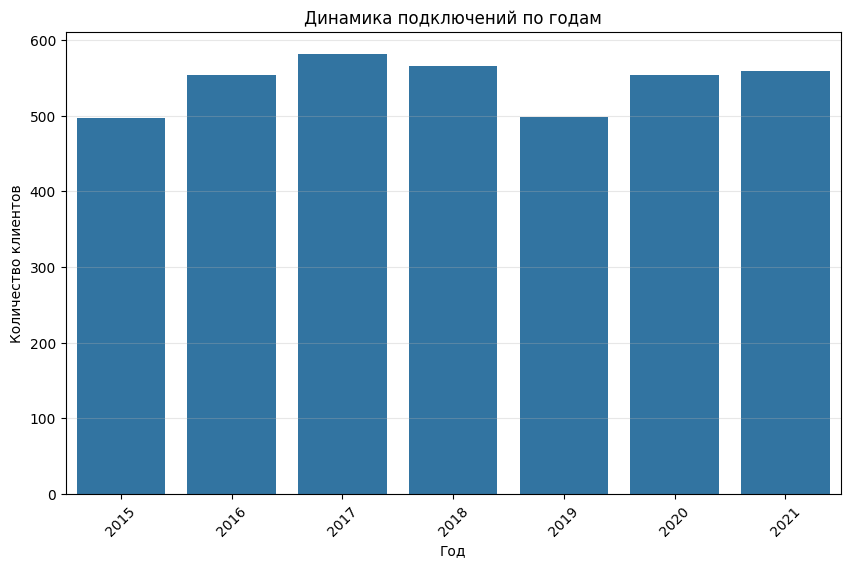

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clients_year.index, y=clients_year.values)
plt.title('Динамика подключений по годам')
plt.xlabel('Год')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

динамика подключений по месяцам

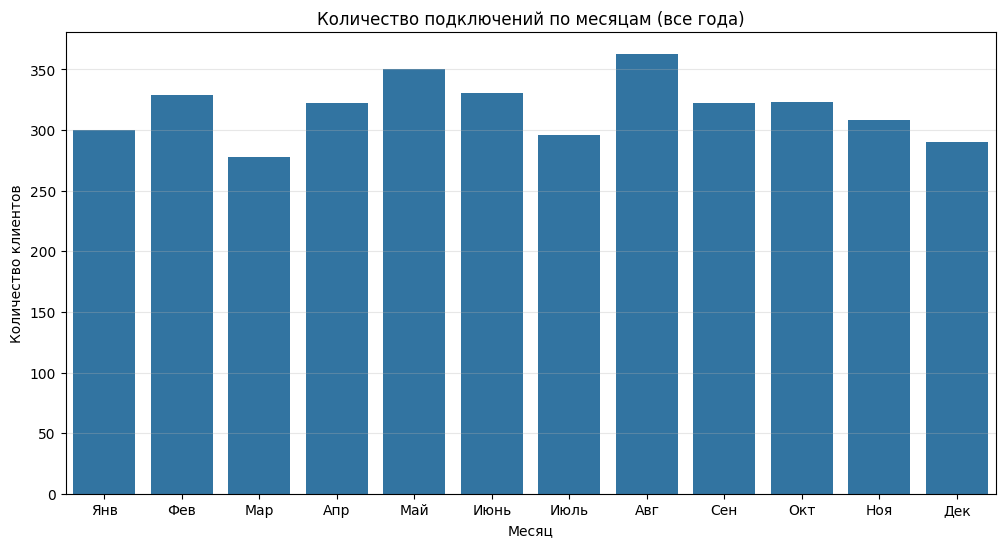

In [55]:
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июнь', 
               'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

plt.figure(figsize=(12, 6))
sns.barplot(x=clients_month.index, y=clients_month.values)
plt.title('Количество подключений по месяцам (все года)')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.xticks(ticks=range(12), labels=month_names)
plt.grid(axis='y', alpha=0.3)
plt.show()

динамика подключений по месяцам и годам

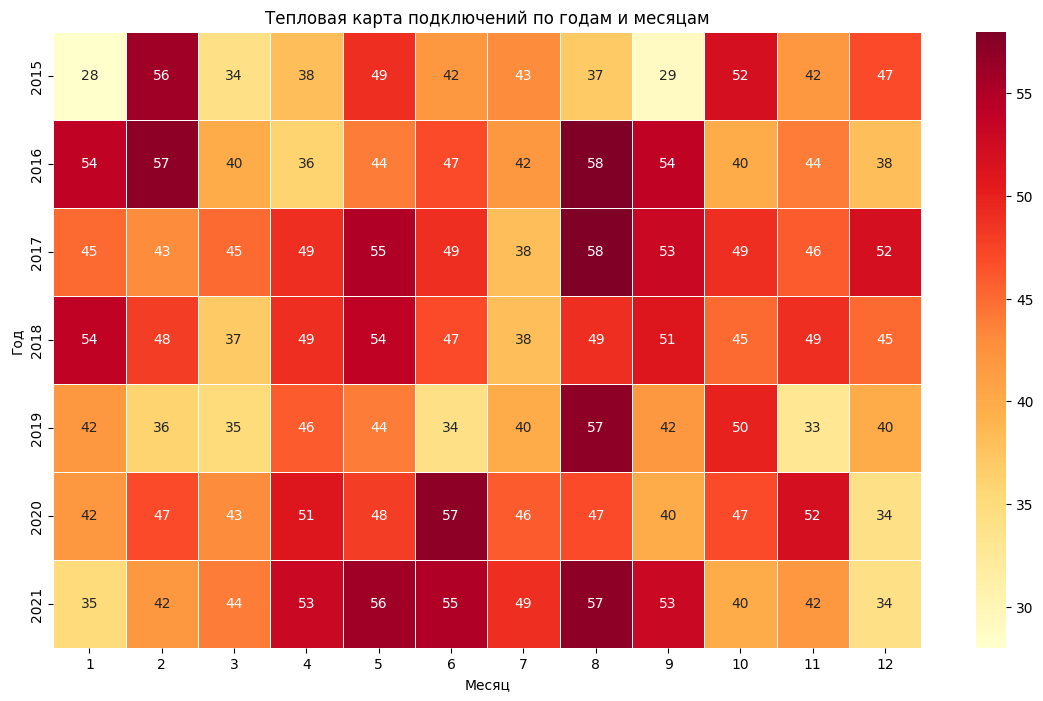

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(clients_year_month, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            linewidths=0.5)
plt.title('Тепловая карта подключений по годам и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Год')
plt.show()

линейный тренд по годам

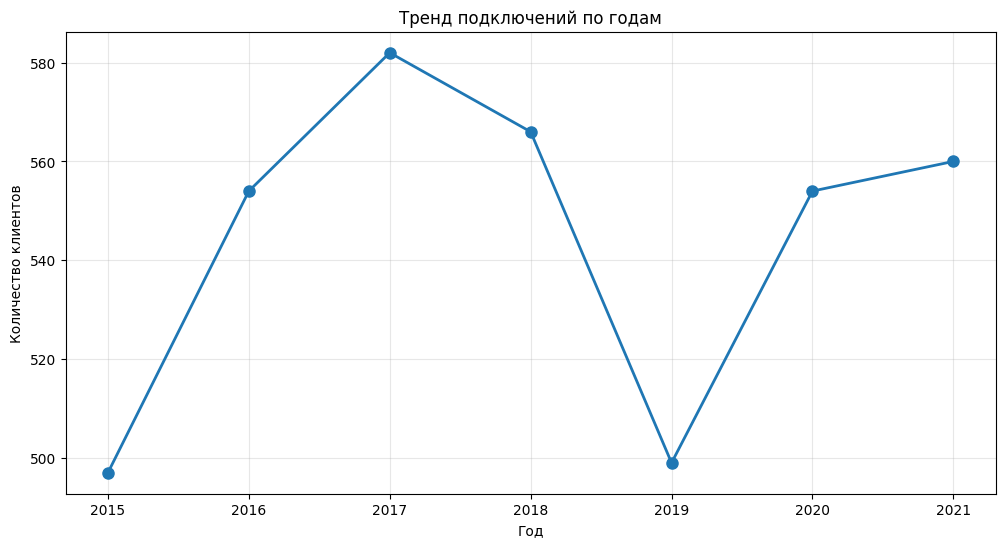

In [58]:
plt.figure(figsize=(12, 6))
clients_year.plot(marker='o', linewidth=2, markersize=8)
plt.title('Тренд подключений по годам')
plt.xlabel('Год')
plt.ylabel('Количество клиентов')
plt.grid(alpha=0.3)
plt.show()

анализ результатов

In [ ]:
max_year = clients_year.idxmax()
min_year = clients_year.idxmin()
max_month = clients_month.idxmax()
min_month = clients_month.idxmin()
print("АНАЛИЗ ДИНАМИКИ ПОДКЛЮЧЕНИЙ:")
print(f"Год с максимальным числом подключений: {max_year} ({clients_year[max_year]} клиентов)")
print(f"Год с минимальным числом подключений: {min_year} ({clients_year[min_year]} клиентов)")
print(f"Месяц с максимальным числом подключений: {max_month} ({clients_month[max_month]} клиентов)")
print(f"Месяц с минимальным числом подключений: {min_month} ({clients_month[min_month]} клиентов)")
print("\nСЕЗОННОСТЬ ПО МЕСЯЦАМ:")
for month in range(1, 13):
    count = clients_month.get(month, 0)
    print(f"{month_names[month-1]}: {count} клиентов")

АНАЛИЗ ДИНАМИКИ ПОДКЛЮЧЕНИЙ:
Год с максимальным числом подключений: 2017 (582 клиентов)
Год с минимальным числом подключений: 2015 (497 клиентов)
Месяц с максимальным числом подключений: 8 (363 клиентов)
Месяц с минимальным числом подключений: 3 (278 клиентов)

СЕЗОННОСТЬ ПО МЕСЯЦАМ:
Янв: 300 клиентов
Фев: 329 клиентов
Мар: 278 клиентов
Апр: 322 клиентов
Май: 350 клиентов
Июнь: 331 клиентов
Июль: 296 клиентов
Авг: 363 клиентов
Сен: 322 клиентов
Окт: 323 клиентов
Ноя: 308 клиентов
Дек: 290 клиентов


## Выводы

- март худший месяц(нужно обратить внимание и принять меры для ликвидации мартовского спада)
- 2019 год серьезное падение подключений(нужен анализ спада)
- в зимние месяцы спад(нужно обратить внимание и принять меры для ликвидации зимнего спада)
- август - лучший месяц
- 2016-2017 активный рост
- 2020-2021 - успешное восстановление после спада


- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);


Группировка по возрастным категориям и подсчет статистик

In [69]:
age_group_st = (df_tele.groupby('age_category').
                agg({'monthly_spend':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'avg_call_duration':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'day_calls':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'evening_calls':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'night_calls':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'other_city_calls':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'international_calls':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'landline_call_ratio':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],

                    'sms_count':
                    ['mean', 'median', lambda x:
                    x.mode()[0] if not x.mode().empty
                    else np.nan],})
                    )


C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3265043436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_st = (df_tele.groupby('age_category').


In [70]:
age_group_st

monthly_spend                    avg_call_duration         \
                          mean  median <lambda_0>              mean median   
age_category                                                                 
student             172.896281  127.43      17.96          2.566332    2.3   
graduate_student    407.093821  338.88     267.54          3.974010    3.5   
businessman         362.392457  307.49      13.92          3.730785    3.2   
expert              279.261575  196.00      16.80          3.249420    2.7   

                             day_calls                   evening_calls  ...  \
                 <lambda_0>       mean median <lambda_0>          mean  ...   
age_category                                                            ...   
student                 0.6  33.035176   34.0       37.0     66.577889  ...   
graduate_student        1.1  57.676420   55.0       55.0     74.874355  ...   
businessman             1.7  51.866816   53.0       62.0     66.096413  ...   
expert                  2.5  39.416252   42.0        5.0     50.290216  ...   

                 other_city_calls international_calls                    \
                       <lambda_0>                mean median <lambda_0>   
age_category                                                              
student                       0.0            0.067839    0.0          0   
graduate_student              0.0            0.323580    0.0          0   
businessman                   0.0            0.296413    0.0          0   
expert                        0.0            0.197347    0.0          0   

                 landline_call_ratio                    sms_count         \
                                mean median <lambda_0>       mean median   
age_category                                                               
student                     3.527638    3.0        0.0  48.982412   41.0   
graduate_student           11.812392   11.0        0.0  26.698795   23.0   
businessman                10.564574   10.0        0.0  12.392377    4.0   
expert                      9.366501    7.0        4.0   2.451078    3.0   

                             
                 <lambda_0>  
age_category                 
student                31.0  
graduate_student       14.0  
businessman             0.0  
expert                  3.0  

[4 rows x 27 columns]

График распледеления расходов по категориям("ящики с усами")

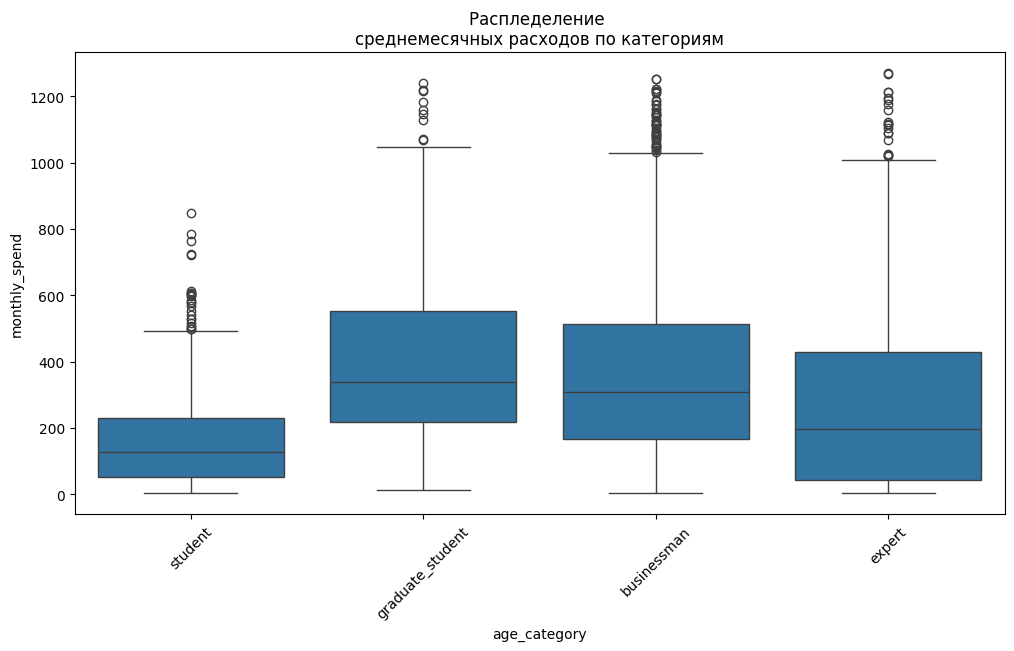

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df_tele,
            x='age_category',
            y='monthly_spend')
plt.title('Распледеление \nсреднемесячных расходов по категориям')
plt.xticks(rotation=45)
plt.show()

выводы по 'ящикам с усами':
- student - минимум затрат
- graduate_student и businessman самые платежеспособные
- businessman - много выбросов сверху - клиенты с большими расходами

Графики активности по времени суток

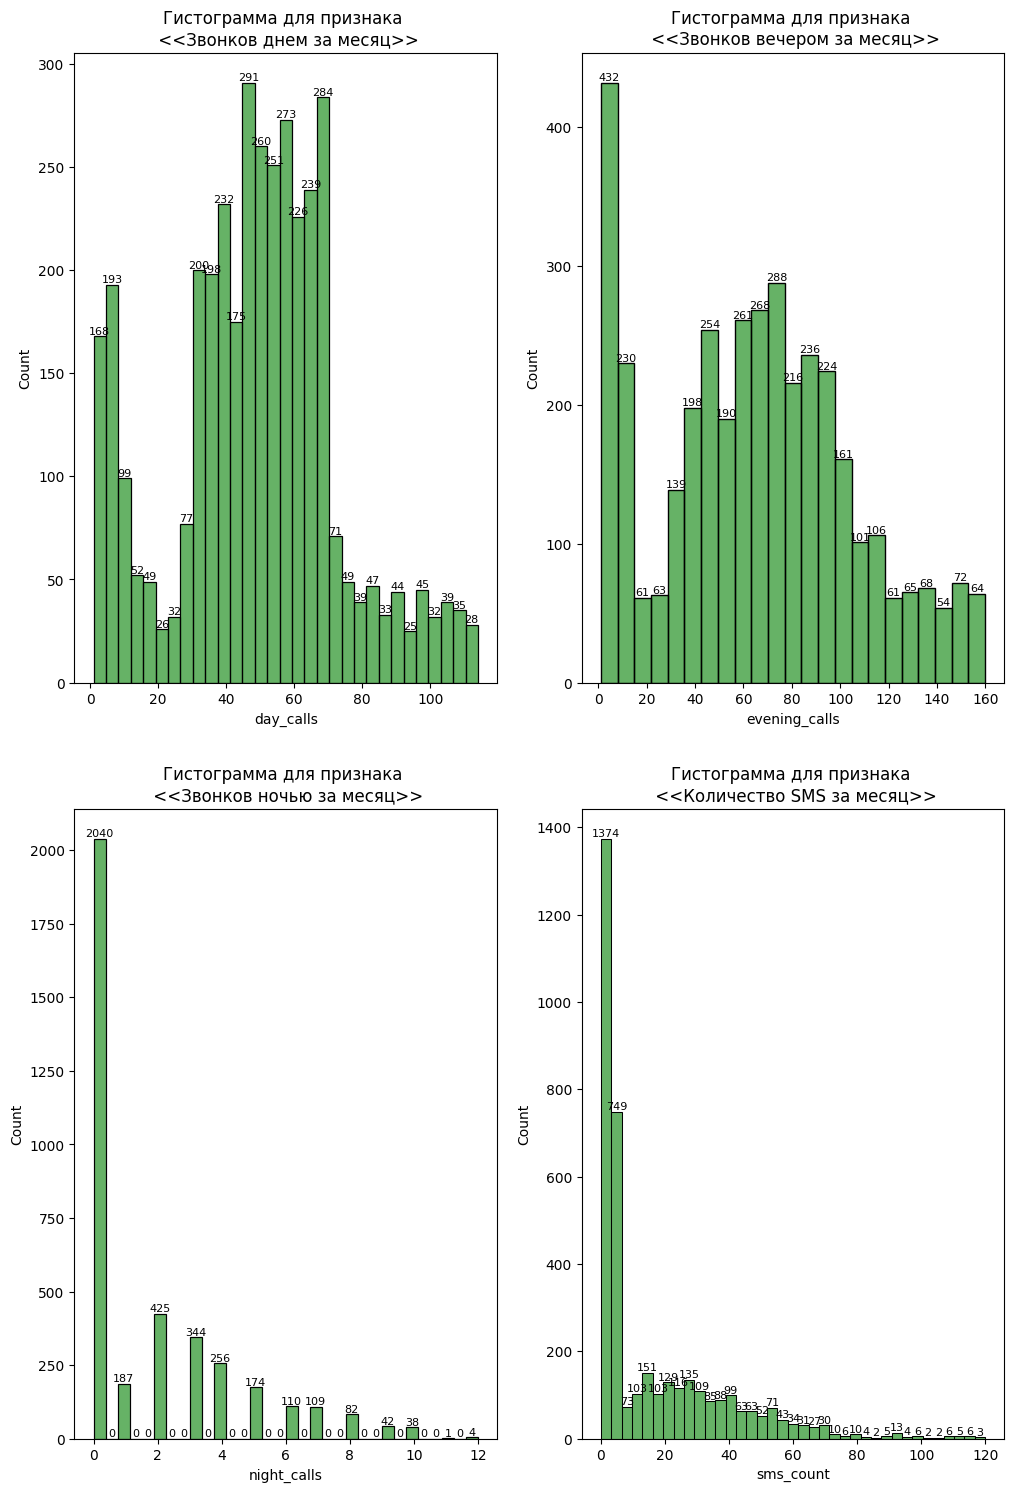

In [122]:
plt.subplots(2, 2, figsize=(12, 18))
lst_time_col = ['day_calls',
                'evening_calls', 
                'night_calls',
                'sms_count']
for index_pic, col in enumerate(lst_time_col, start=1):
   # print(index_pic, col)
    plt.subplot(2,2, index_pic)
    ax = sns.histplot(x=df_tele[col],
                       color='green',
                       alpha=0.6,
                       legend='full');
    plt.title(f'Гистограмма для признака \n <<{dct_to_pic[col]}>>')
    for container in ax.containers:
        ax.bar_label(container, fontsize=8) 

выводы по гистограммам: 
- День: Наиболее активное время для звонков
- Вечер: второй по активности период
- Ночь: минимальная активность(большинство не звонит вообще)
- sms: большинство клиентов отправляет мало смс. Есть небольшая группа активных пользователей

Графики со средними значениями по возрастным категориям

In [124]:
lst_met = ['monthly_spend', 'day_calls',
          'evening_calls', 'night_calls',
          'other_city_calls', 'sms_count', 'avg_call_duration']

C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3379215807.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_1 = sns.barplot(data=df_tele, x='age_category', y=metric,
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3379215807.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_1 = sns.barplot(data=df_tele, x='age_category', y=metric,
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3379215807.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_1 = sns.barplot(data=df_tele, x='age_category', y=metric,
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3379215807.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_1 = sns.barplot(data=df_tele, x='age_category', y=metric,
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3379215807.py:5: F

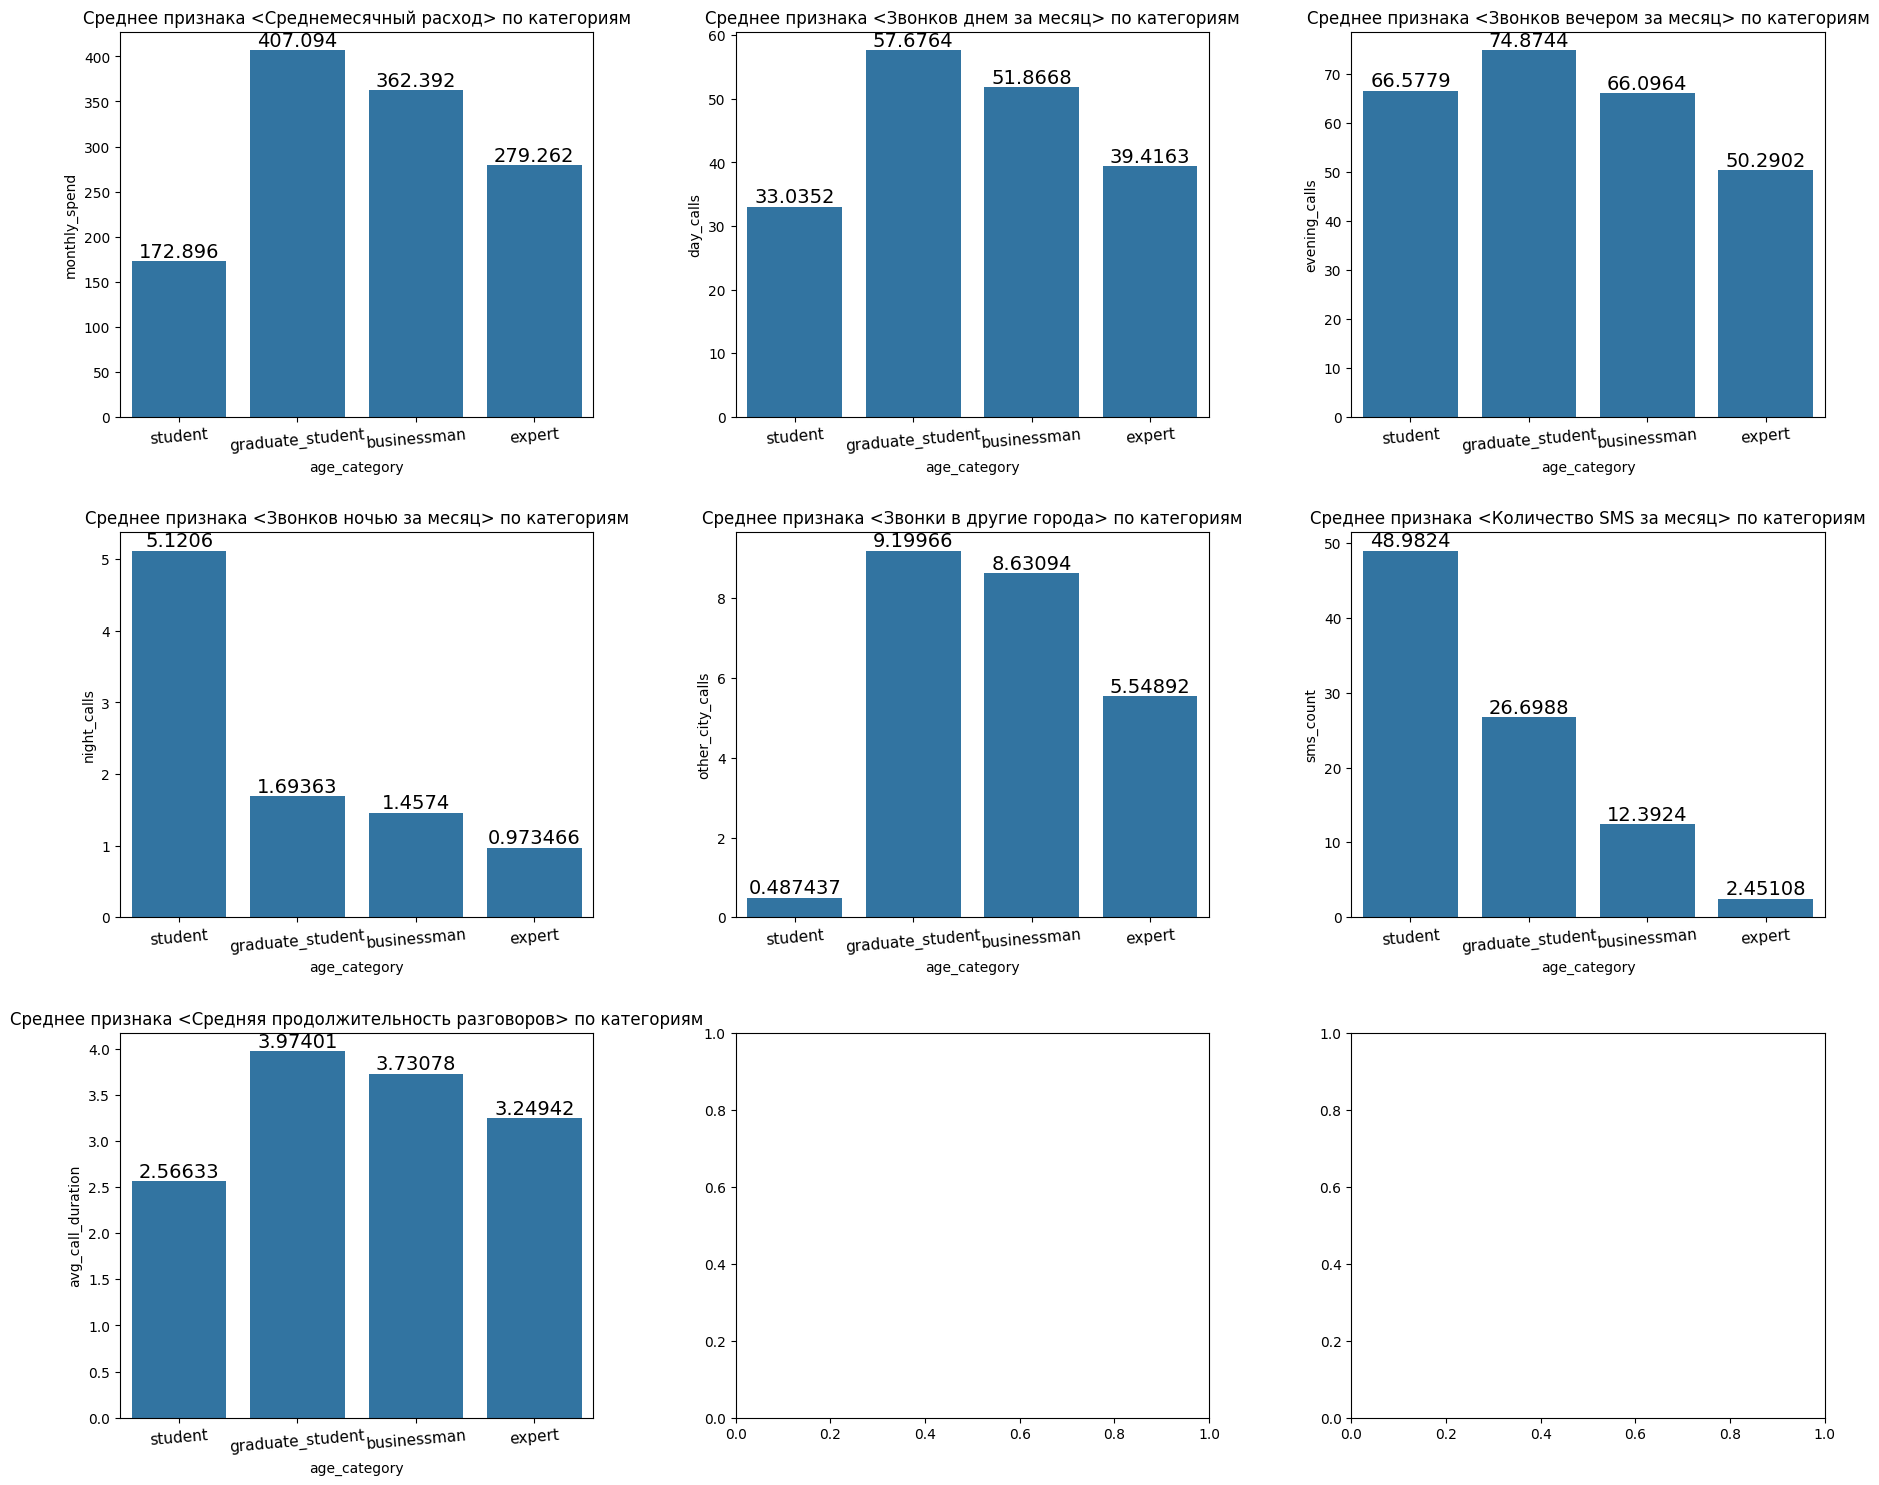

In [125]:
fig, axes = plt.subplots(3, 3, figsize=(22, 18), gridspec_kw={'wspace': 0.3,
                                                'hspace': 0.3});
for i, metric in enumerate(lst_met):
    row, col = i // 3, i % 3
    ax_1 = sns.barplot(data=df_tele, x='age_category', y=metric, 
                ax=axes[row, col], estimator='mean', ci=None);
    axes[row, col].set_title(f'Среднее признака <{dct_to_pic[metric]}> по категориям');
    axes[row, col].tick_params(axis='x', rotation=5, labelsize= 11)
    for container in ax_1.containers:
        ax_1.bar_label(container, fontsize=14)



выводы:
- graduate_student - самые высокие расходы в среднем. Самые активные днем и вечером.\
много звонков в другие города.
- student - ночные звонки(почти в 5 раз больше других). Активно пользуются sms
- expert - умеренные показатели. вечером менее активная группа

Гистограммы распледеления среднемесячных расходов по возрастным категориям

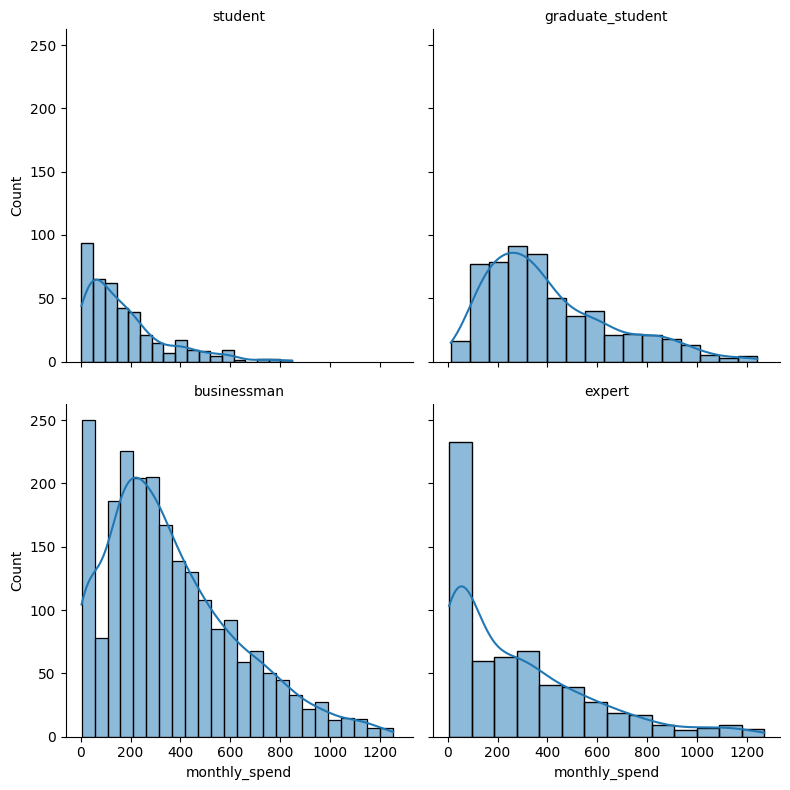

In [82]:
g = sns.FacetGrid(df_tele, col='age_category', col_wrap=2, height=4)
g.map(sns.histplot, 'monthly_spend', kde=True)
g.set_titles('{col_name}')
plt.show()

выводы плюс минус те же, что и по графику "ящики с усами"

- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи; 
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью.
    -  Совпадают ли результаты с предыдущем пунктом;\
Какие выводы можно сделать?

In [ ]:
avg_monthly_spending = df_tele.groupby('age_category')['monthly_spend'].mean().round(2)
avg_monthly_spending_sorted = avg_monthly_spending.sort_values(ascending=False)
print("ТОП-2 КАТЕГОРИЙ ПО СРЕДНИМ МЕСЯЧНЫМ ТРАТАМ:")
print(avg_monthly_spending_sorted.head(2))

ТОП-2 КАТЕГОРИЙ ПО СРЕДНИМ МЕСЯЧНЫМ ТРАТАМ:
age_category
graduate_student    407.09
businessman         362.39
Name: monthly_spend, dtype: float64


C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\15728543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_spending = df_tele.groupby('age_category')['monthly_spend'].mean().round(2)


ТОП 2 ПО КОЛИЧЕСТВУ ЗВОНКОВ

In [140]:
print("ДНЕМ:")
print(df_tele.groupby('age_category')['day_calls'].mean().round(2).sort_values(ascending=False).head(2))
print("\nВЕЧЕРОМ:")
print(df_tele.groupby('age_category')['evening_calls'].mean().round(2).sort_values(ascending=False).head(2))
print("\nНОЧЬЮ:")
print(df_tele.groupby('age_category')['night_calls'].mean().round(2).sort_values(ascending=False).head(2))

ДНЕМ:
age_category
graduate_student    57.68
businessman         51.87
Name: day_calls, dtype: float64

ВЕЧЕРОМ:
age_category
graduate_student    74.87
student             66.58
Name: evening_calls, dtype: float64

НОЧЬЮ:
age_category
student             5.12
graduate_student    1.69
Name: night_calls, dtype: float64


C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3279183414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_tele.groupby('age_category')['day_calls'].mean().round(2).sort_values(ascending=False).head(2))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3279183414.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_tele.groupby('age_category')['evening_calls'].mean().round(2).sort_values(ascending=False).head(2))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\3279183414.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

ТОП-2 КАТЕГОРИЙ ПО ОБЩЕМУ ВРЕМЕНИ ОБЩЕНИЯ

In [ ]:
df_tele['days_time'] = df_tele['avg_call_duration'] * df_tele['day_calls']
df_tele['evening_time'] = df_tele['avg_call_duration'] * df_tele['evening_calls']
df_tele['night_time'] = df_tele['avg_call_duration'] * df_tele['night_calls']
time_day = df_tele.groupby('age_category')['days_time'].mean().round(2)
time_evening = df_tele.groupby('age_category')['evening_time'].mean().round(2)
time_night = df_tele.groupby('age_category')['night_time'].mean().round(2)
time_day_sorted = time_day.sort_values(ascending=False)
time_evening_sorted = time_evening.sort_values(ascending=False)
time_night_sorted = time_night.sort_values(ascending=False)
print("ТОП-2 КАТЕГОРИЙ ПО ОБЩЕМУ ВРЕМЕНИ ОБЩЕНИЯ:")
print("\nДНЕМ:")
print(time_day_sorted.head(2))
print("\nВЕЧЕРОМ:")
print(time_evening_sorted.head(2))
print("\nНОЧЬЮ:")
print(time_night_sorted.head(2))

ТОП-2 КАТЕГОРИЙ ПО ОБЩЕМУ ВРЕМЕНИ ОБЩЕНИЯ:

ДНЕМ:
age_category
graduate_student    228.17
businessman         204.54
Name: days_time, dtype: float64

ВЕЧЕРОМ:
age_category
graduate_student    298.04
businessman         262.20
Name: evening_time, dtype: float64

НОЧЬЮ:
age_category
student             12.75
graduate_student     6.90
Name: night_time, dtype: float64


C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\645601535.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_day = df_tele.groupby('age_category')['days_time'].mean().round(2)
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\645601535.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_evening = df_tele.groupby('age_category')['evening_time'].mean().round(2)
C:\Users\Администратор\AppData\Local\Temp\ipykernel_25196\645601535.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur


|||
|--:|:--|
|`ТОП 2 ПО КОЛИЧЕСТВУ ЗВОНКОВ`|`ТОП-2 ПО ОБЩЕМУ ВРЕМЕНИ ОБЩЕНИЯ`|
|||
|`ДНЕМ`:|`ДНЕМ`:|                                       
|`graduate_student`= 57.68|`graduate_student` = 228.17|
|`businessman`= 51.87|`businessman` = 204.54|
|||        
|`ВЕЧЕРОМ`:|`ВЕЧЕРОМ`:|                                                
|`graduate_student` = 74.87|`graduate_student` = 298.04|
|`student` = 66.58|`businessman` = 262.20|
|||
|`НОЧЬЮ`:|`НОЧЬЮ`:|                                           
|`student` = 5.12|`student` = 12.75|
|`graduate_student` = 1.69|`graduate_student` = 6.90|

результаты в основном совпадают, не совпадают только в вечерних звонках:
- студенты делают много коротких звонков, бизнесмены меньше, но дольше разговаривают.
### выводы:

- студенты - много звонков, но коротких. Активны вечером и ночью.
- бизнесмены - меньше звонков, но дольше длятся.
- аспиранты - лидеры по всем показателям.




- Студенты - активные ночью, короткие звонки, мало тратит. Пользуются sms.
- Аспиранты - максимальная ценность клиента. Абсолютные лидеры активности
- Бизнесмены - максимальная общая ценность.
- Знаток - стабильные не высокие траты. 
- наиболее ценные группы: Аспиранты, Бизнесмены 
